가진 데이터는 2016년까지. 따라서 **2017년도 시점에서 2018년도 상반기 출시할 게임을 설계한다고 가정.**

##EDA

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv("vgames2.csv")

In [3]:
#unknown 컬럼 삭제
data = data.iloc[:,1:]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [5]:
#원데이터
data_org = data.copy()

In [6]:
#중복데이터 제거 후 인덱스 재설정
data.drop_duplicates(inplace=True)
data.reset_index()

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...,...
16592,16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16593,16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16594,16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16595,16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [7]:
# data.loc[data['Name'] == 'The Munchables', 'Year'] # loc[인덱싱 조건, 가져올 컬럼]

In [8]:
# Year컬럼 결측치 확인
year_miss = data[data.Year.isnull() == True]
year_miss.shape

(270, 9)

In [9]:
# Year컬럼에 결측치가 있지만 동일한 Name을 가진 행에 Year값이 존재하는 경우
ndyn = data[data.Name.duplicated()&data.Year.isnull()]

**Name이 중복되는 Year컬럼 결측치 대체**

In [10]:
data[data["Name"] == 'Bejeweled 3']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2710,Bejeweled 3,PC,2010.0,Puzzle,PopCap Games,0.02,0.05,0,0.01
4608,Bejeweled 3,PS3,NaN,Puzzle,Unknown,0.13,0,0,0.01
10269,Bejeweled 3,DS,NaN,Puzzle,Unknown,0.32,0.02,0,0.03
16432,Bejeweled 3,X360,NaN,Puzzle,Unknown,0.13,0,0,0.01


In [11]:
# 연도 데이터가 없는 중복 이름데이터의 리스트에서
for name in ndyn['Name'].unique():
# Name컬럼이 name인 행들의 year값까지 추출하고, 결측치 제거후 (처음 출시된 년도로 대체하기로 결정)
  value = data.loc[data['Name']==name,'Year'].dropna().sort_values()
  value_fvi = value.first_valid_index()
  if value_fvi is not None:
    year = data.loc[value_fvi, 'Year']
  data.loc[(data['Name'] == name)& data['Year'].isnull(), "Year"]= year 


In [12]:
# Year컬럼의 이상치 확인
data.Year.unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03, 1.984e+03,
       1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00, 9.700e+01,
       1.995e+03, 1.993e+03,       nan, 2.012e+03, 1.987e+03, 1.982e+03,
       1.100e+01, 1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03,
       1.983e+03, 1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01,
       6.000e+00, 8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00,
       1.000e+01, 9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01,
       9.500e+01, 2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01,
       0.000e+00, 1.200e+01, 9.400e+01])

In [13]:
data.loc[data.Year == 8]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1684,SpongeBob SquarePants featuring Nicktoons: Glo...,PS2,8.0,Action,THQ,0.29,0.22,0,0.07
3108,NPPL: Championship Paintball 2009,PS2,8.0,Shooter,Activision Value,0.13,0.1,0,0.03
4255,Shaun White Snowboarding,X360,8.0,Sports,Ubisoft,0.48,0.26,0,0.08
6130,Karaoke Revolution Presents American Idol Encore,PS3,8.0,Misc,Konami Digital Entertainment,0.08,0,0,0.01
7178,Shaun White Snowboarding,PSP,8.0,Sports,Ubisoft,0.26,0.03,0,0.03
7362,The Void,PC,8.0,Adventure,Mamba Games,0,0.03,0,0.01
8928,Imagine: Ballet Star,DS,8.0,Simulation,Ubisoft,0.23,0.01,0,0.02
15263,Fading Shadows,PSP,8.0,Puzzle,Ivolgamus,0.03,0,0,0
15511,Pac-Man Power Pack,PS2,8.0,Misc,Namco Bandai Games,0.04,0.03,0,0.01
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0


In [14]:
# int형 변환 전에 기존 데이터와 구분하기 위해 -값으로 대체
data.Year.fillna(-1, inplace=True)

In [15]:
# 데이터타입 변경
data.Year = data.Year.astype(int)
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [16]:
#data.Year.unique()

In [17]:
# 23미만은 2000년대로, 23이상 100미만은 1900년대로 수정
drop_year_list = pd.DataFrame()
for year in data.Year:
  if year >=0 and year <=23:
    data.loc[data['Year']==year,'Year'] += 2000
  elif year>23 and year<100:
    data.loc[data['Year']==year,'Year'] += 1900
  elif year == -1:
    drop_year_list = data[data.Year == year] # 아까 결측치들 분류
  else:
    pass

In [18]:
len(drop_year_list)

158

In [19]:
# 나머지 Year 결측치는 제거
data.drop(drop_year_list.index, axis =0, inplace=True)
data.reset_index(drop=True, inplace=True) #drop=False(default) 원래 인덱스 drop 여부

In [20]:
# Year 컬럼 이상치 확인
data.Year.unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [21]:
year_2020 = data[data.Year == 2020]
data.drop(year_2020.index, axis =0, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16438 entries, 0 to 16438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         16438 non-null  object
 1   Platform     16438 non-null  object
 2   Year         16438 non-null  int64 
 3   Genre        16388 non-null  object
 4   Publisher    16399 non-null  object
 5   NA_Sales     16438 non-null  object
 6   EU_Sales     16438 non-null  object
 7   JP_Sales     16438 non-null  object
 8   Other_Sales  16438 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [23]:
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04


In [24]:
# Sales컬럼의 이상치 제거 후 데이터타입 변환

In [25]:
data.loc[data.JP_Sales.str.contains('M')]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
489,Rise of Nightmares,X360,2011,Action,Sega,0.28,0.13,0.01M,0.04
579,Imagine: Figure Skater (US sales),DS,2007,Sports,Ubisoft,0.46,0.01,0M,0
874,Super Robot Taisen α,PS,2000,Strategy,Banpresto,0,0,0.75M,0.05
891,Honda ATV Fever,Wii,2010,Racing,Storm City Games,0.04,0,0M,0
942,Kirby's Epic Yarn,Wii,2010,Platform,Nintendo,1.47,0.09,0.45M,0.11
...,...,...,...,...,...,...,...,...,...
16034,NFL Xtreme 2,PS,1999,Sports,989 Studios,0.27,0.18,0M,0.03
16117,Space Invaders,2600,1994,Shooter,Atari,2.36,0.14,0M,0.03
16143,Wonder World Amusement Park,DS,2009,Misc,Majesco Entertainment,0.08,0,0M,0.01
16340,Shin Chan: Las Nuevas Aventuras Para Wii!,Wii,2006,Action,505 Games,0,0,0.07M,0


In [26]:
# Sales컬럼의 unique value 확인
data.NA_Sales.unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

###K 문자 데이터만 따로 빼서 문자제거, 데이터변환 , *0.001까지 해야함 str.contains()로구분해보자###

In [27]:
# sales컬럼들의 이상치 수정 M(million),K(thousand) 및 데이터 변환
def sales_correct(col):
  M_sales = data[data[col].str.contains("M")] # M포함 데이터
  K_sales = data[data[col].str.contains("K")] # K포함 데이터
  num_sales = data[(data[col].str.contains("M")==False) & (data[col].str.contains("K") == False)] # 정상데이터
# K 삭제 후 데이터변환, M단위로 변환
  K_sales = K_sales[col].str.replace("K",'', regex=False)
  K_sales = K_sales.astype(float)
  K_sales = round(K_sales*0.001,3)
# M 삭제 후 데이터변환
  M_sales = M_sales[col].str.replace('M','', regex=False)
  M_sales = M_sales.astype(float)
# 데이터변환
  num_sales = num_sales.NA_Sales.astype(float)
  sales = pd.concat([M_sales,K_sales,num_sales])
  return sales

In [28]:
# sales컬럼들에 적용
for sales in list(data.columns)[-4:]:
  data[sales] = sales_correct(sales)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16438 entries, 0 to 16438
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16438 non-null  object 
 1   Platform     16438 non-null  object 
 2   Year         16438 non-null  int64  
 3   Genre        16388 non-null  object 
 4   Publisher    16399 non-null  object 
 5   NA_Sales     16438 non-null  float64
 6   EU_Sales     16438 non-null  float64
 7   JP_Sales     16438 non-null  float64
 8   Other_Sales  16438 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.3+ MB


In [30]:
data.NA_Sales.describe()

count    16438.000000
mean         0.265704
std          0.820086
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

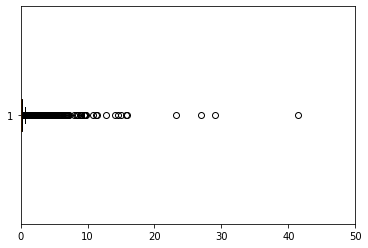

In [31]:
plt.boxplot(data.NA_Sales, vert=False)
plt.xlim(0,50)
plt.show();

In [32]:
# NA 이상치 제거
drop_NA = data[data['NA_Sales'] > 20]
drop_NA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1192,Tetris,GB,1989,Puzzle,Nintendo,23.20,23.20,23.20,23.20
2876,Wii Sports,Wii,2006,Sports,Nintendo,41.49,41.49,41.49,41.49
4150,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,29.08,29.08,29.08
10380,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,26.93,26.93,26.93


###이상치라고 판단하고 제거하려고 했으나, 데이터 확인 결과 단순히 Nintendo사의 판매량이 많은 것이라고 판단하고 제거하지 않음

In [33]:
nintendo = data[data.Publisher == 'Nintendo']
nintendo.sort_values('NA_Sales', ascending=False)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2876,Wii Sports,Wii,2006,Sports,Nintendo,41.49,41.49,41.49,41.49
4150,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,29.08,29.08,29.08
10380,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,26.93,26.93,26.93
1192,Tetris,GB,1989,Puzzle,Nintendo,23.20,23.20,23.20,23.20
12452,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,15.85,15.85,15.85
...,...,...,...,...,...,...,...,...,...
9357,DS Bungaku Zenshuu,DS,2007,Misc,Nintendo,0.00,0.00,0.00,0.00
9411,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.00,0.00,0.00,0.00
9431,L'Aigle de Guerre,GBA,2001,Strategy,Nintendo,0.00,0.00,0.00,0.00
9466,Irozuki Tingle no Koi no Balloon Trip,DS,2009,Adventure,Nintendo,0.00,0.00,0.00,0.00


###전지역 출고량이 0인 데이터는 인기도나 트렌드 분석에 무의미하다고 판단, 제거

In [34]:
non_sale = data[(data.NA_Sales == 0) & (data.EU_Sales == 0) & (data.JP_Sales == 0) & (data.Other_Sales == 0)]
non_sale

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,0.0,0.0
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.0,0.0,0.0,0.0
8,Imabikisou,PS3,2007,Adventure,Sega,0.0,0.0,0.0,0.0
12,Mount & Blade,PC,2008,Role-Playing,Paradox Interactive,0.0,0.0,0.0,0.0
14,Zoids Dash,DS,2006,Role-Playing,Tomy Corporation,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
16427,Jikkyou Powerful Pro Yakyuu 2000 Ketteiban,PS,2000,Sports,Konami Digital Entertainment,0.0,0.0,0.0,0.0
16430,Namco Soccer Prime Goal,PS,1995,Sports,Sony Computer Entertainment,0.0,0.0,0.0,0.0
16431,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.0,0.0,0.0,0.0
16433,Minna no Chizu 2,PSP,2007,Misc,Zenrin,0.0,0.0,0.0,0.0


In [35]:
#한 지역이라도 출고량이 있는 데이터
data.drop(non_sale.index, inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12044 entries, 0 to 12043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         12044 non-null  object 
 1   Platform     12044 non-null  object 
 2   Year         12044 non-null  int64  
 3   Genre        12003 non-null  object 
 4   Publisher    12017 non-null  object 
 5   NA_Sales     12044 non-null  float64
 6   EU_Sales     12044 non-null  float64
 7   JP_Sales     12044 non-null  float64
 8   Other_Sales  12044 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 847.0+ KB


In [36]:
# genre 결측치
genre_miss = data[data.Genre.isnull()==True]
genre_exist = data[data.Genre.isnull()==False]
# 결측치의 name이 정상데이터에 존재하면 그 값을 가져오기
# genre 결측치 총 41개
none = 0
for name in genre_miss.Name: # 결측치 컬럼의 Name중에
  if name in list(genre_exist.Name.unique()): # name이 정상데이터에 중복된다면
    genre = genre_exist.loc[genre_exist['Name'] == name, 'Genre'].iloc[0] #값 여러개 나온다 하나만 따오자
    genre_miss.loc[genre_miss['Name'] == name, 'Genre'] = genre #정상데이터의 Genre값으로 대체
  else:
    none += 1 #중복되는 name이 없었던 행의 개수
genre = pd.concat([genre_miss, genre_exist]) # 새 Genre 데이터생성
# print(len(genre)) #12045
# print(len(data['Genre'])) #120455
print('none: ',none) #24
data['Genre'] = genre.Genre
print('결측치: ',data['Genre'].isnull().sum()) #24

none:  24
결측치:  24


/usr/local/lib/python3.9/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [37]:
# Genre컬럼의 나머지 24 결측치는 'Unknown'으로 대체
data['Genre'].fillna('Unknown', inplace=True)
data['Genre'].isnull().sum()

0

In [38]:
data.Genre.unique()

array(['Action', 'Misc', 'Platform', 'Simulation', 'Racing', 'Puzzle',
       'Strategy', 'Role-Playing', 'Sports', 'Fighting', 'Shooter',
       'Adventure', 'Unknown'], dtype=object)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12044 entries, 0 to 12043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         12044 non-null  object 
 1   Platform     12044 non-null  object 
 2   Year         12044 non-null  int64  
 3   Genre        12044 non-null  object 
 4   Publisher    12017 non-null  object 
 5   NA_Sales     12044 non-null  float64
 6   EU_Sales     12044 non-null  float64
 7   JP_Sales     12044 non-null  float64
 8   Other_Sales  12044 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 847.0+ KB


In [40]:
# # Publisher 결측치
publish_miss = data[data["Publisher"].isnull()==True]
publish_exist = data[data.Publisher.isnull()==False]
# # 결측치의 name이 정상데이터에 존재하면 그 값을 가져오기 => !!!존재하지 않음!!!
# # publish 결측치 총 27개
# none = 0
# for name in publish_miss.Name: # 결측치 컬럼의 Name중에
#   if name in list(publish_exist.Name.unique()): # name이 정상데이터에 중복된다면
#     publish = publish_exist.loc[publish_exist['Name'] == name, 'Publisher'].iloc[0] #값 여러개 나온다 하나만 따오자
#     publish_miss.loc[publish_miss['Name'] == name, 'Publisher'] = publish #정상데이터의 Publisher값으로 대체
#   else:
#     none += 1 #중복되는 name이 없었던 행의 개수
# publish = pd.concat([publish_miss, publish_exist]) # 새 Genre 데이터생성
# print(none)


In [41]:
# Publisher값이 "Unknown"이지만 동일한 Name을 가진 행에 Publisher가 존재하는 경우
# Publisher 이상치
publish_un = data[data["Publisher"] == 'Unknown'] # 79개
publish_known = data[data["Publisher"] != 'Unknown']

none = 0
for name in publish_un.Name: # 결측치 컬럼의 Name중에
  if name in list(publish_known.Name.unique()): # name이 정상데이터에 중복된다면
    publish = publish_known.loc[publish_known['Name'] == name, 'Publisher'].iloc[0] #값 여러개 나온다 하나만 따오자
    publish_un.loc[publish_un['Name'] == name, 'Publisher'] = publish #정상데이터의 Publisher값으로 대체
  else:
    none += 1 #중복되는 name이 없었던 행의 개수
publish = pd.concat([publish_un, publish_known]) # 새 Genre 데이터생성
print('none: ',none) #48개
data.Publisher = publish.Publisher
print('Unknown개수: ',len(data[data["Publisher"] == 'Unknown'])) #48

none:  48
Unknown개수:  48


In [42]:
# Publisher 결측치 대체
data.Publisher.fillna("Unknown", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12044 entries, 0 to 12043
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         12044 non-null  object 
 1   Platform     12044 non-null  object 
 2   Year         12044 non-null  int64  
 3   Genre        12044 non-null  object 
 4   Publisher    12044 non-null  object 
 5   NA_Sales     12044 non-null  float64
 6   EU_Sales     12044 non-null  float64
 7   JP_Sales     12044 non-null  float64
 8   Other_Sales  12044 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 847.0+ KB


##시각화

###지역에 따라서 선호하는 게임 장르가 다를까?
- 지역은 어떻게 구분했나요?
  - **출고량에서 분류되어있는 나라 기준**
- 지역별로 선호하는 게임의 장르를 파악했나요?
  - **모든 지역에서 Action장르의 출고량이 가장 많았고, 다른 장르들의 분포도 같았음**
- 지역별로 선호하는 게임의 장르가 왜 같다고/다르다고 생각했나요?
  - **지역별로 선호하는 장르순위와 출고량이 매우 유사하기 때문에**



In [43]:
# 지역별 장르별, 출고량
# 내림차순 정렬
NA = data.loc[:,['Genre','NA_Sales']].groupby('Genre').sum().reset_index().sort_values('NA_Sales', ascending=False)
EU = data.loc[:,['Genre','EU_Sales']].groupby('Genre').sum().reset_index().sort_values('EU_Sales', ascending=False)
EU.EU_Sales = round(EU.EU_Sales,2)
JP = data.loc[:,['Genre','JP_Sales']].groupby('Genre').sum().reset_index().sort_values('JP_Sales', ascending=False)
Others = data.loc[:,['Genre','Other_Sales']].groupby('Genre').sum().reset_index().sort_values('Other_Sales', ascending=False)
Others.Other_Sales = round(Others.Other_Sales,2)


In [44]:
# North America 장르별 출고량
NA_x = list(NA.Genre)
NA_y = list(NA.NA_Sales)
# Europe 장르별 출고량
EU_x = list(EU.Genre)
EU_y = list(EU.EU_Sales)
# Japan 장르별 출고량
JP_x = list(JP.Genre)
JP_y = list(JP.JP_Sales)
# Others 장르별 출고량
O_x = list(Others.Genre)
O_y = list(Others.Other_Sales)

In [45]:
# North America에서 가장 인기있는 장르
print('North America 인기장르: ',NA[NA.NA_Sales == NA.NA_Sales.max()].Genre)
# Europe에서 가장 인기있는 장르
print('Europe 인기장르: ',EU[EU.EU_Sales == EU.EU_Sales.max()].Genre)
# Japan에서 가장 인기있는 장르
print('Japan 인기장르: ',JP[JP.JP_Sales == JP.JP_Sales.max()].Genre)
# Other Nation에서 가장 인기있는 장르
print('Other Nation 인기장르: ',Others[Others.Other_Sales == Others.Other_Sales.max()].Genre)

North America 인기장르:  0    Action
Name: Genre, dtype: object
Europe 인기장르:  0    Action
Name: Genre, dtype: object
Japan 인기장르:  0    Action
Name: Genre, dtype: object
Other Nation 인기장르:  0    Action
Name: Genre, dtype: object


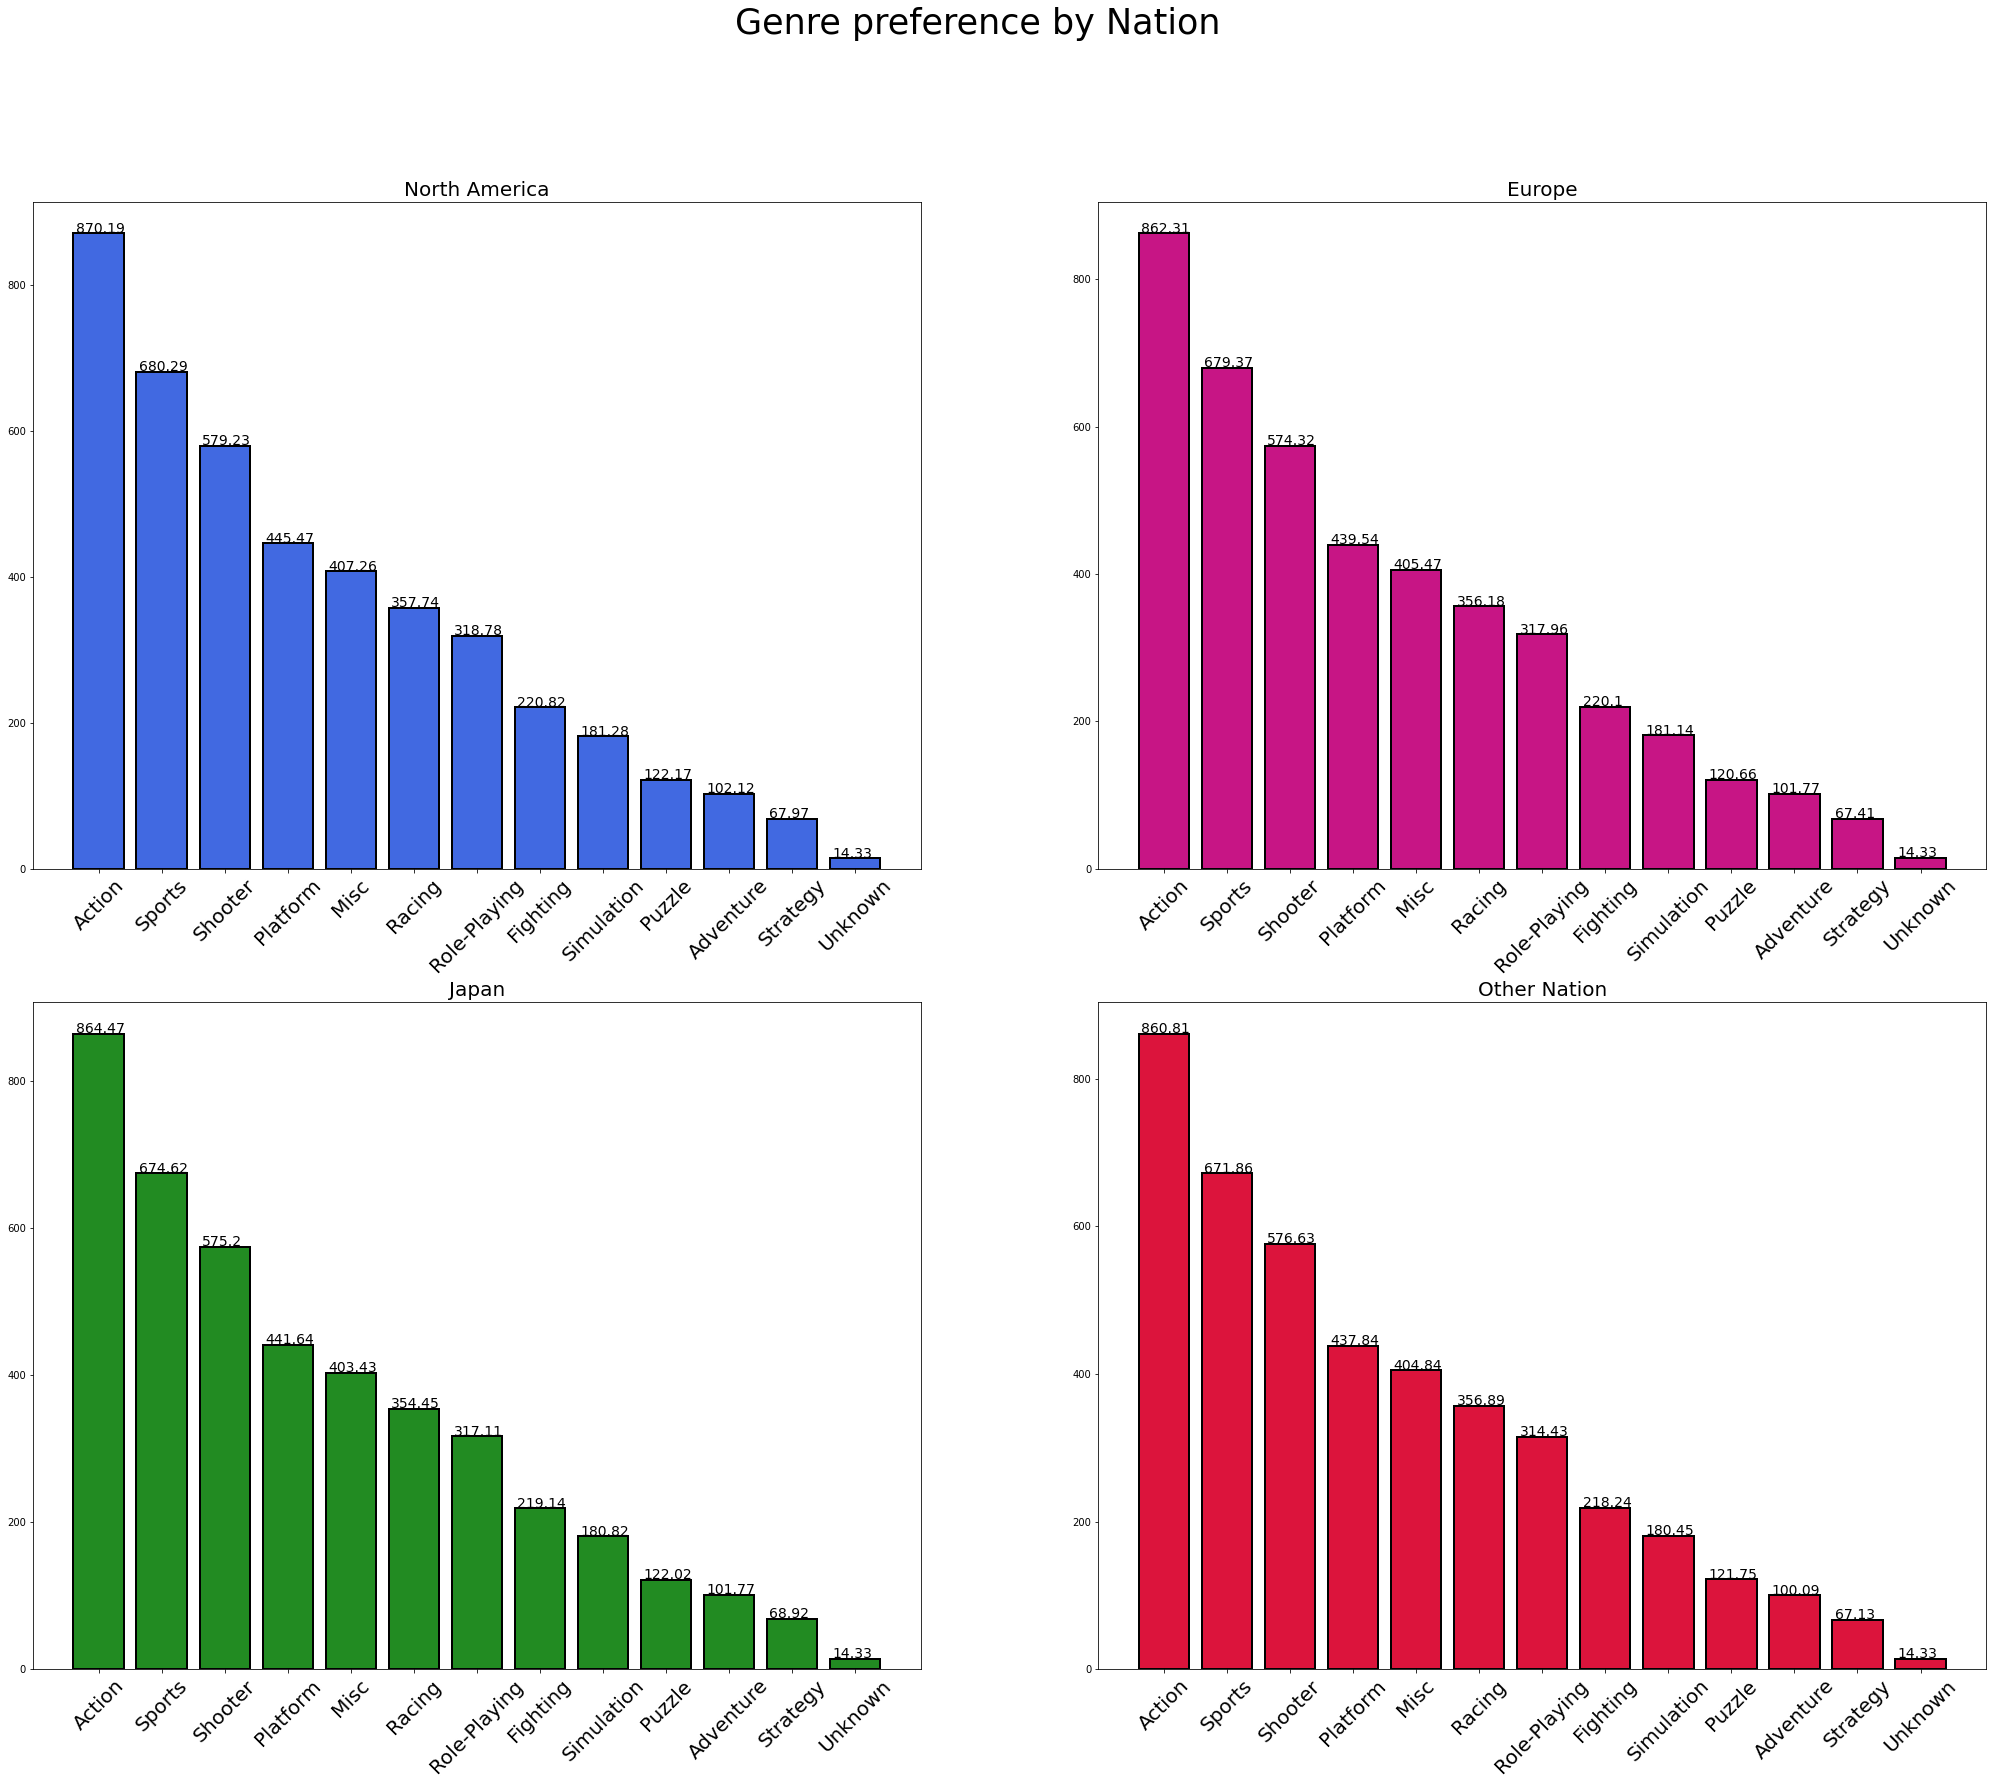

In [46]:
#fig, ax = plt.subplots()

plt.figure(figsize=(35,27)).set_facecolor('white')
plt.subplot(2,2,1)
plt.title("North America", fontsize=20)
plt.bar(NA_x,NA_y , color= 'royalblue', edgecolor='black', linewidth=2)
plt.xticks(fontsize=20, rotation=45)
for index, value in enumerate(NA_y):
  plt.text(index - 0.36, value + 1, str(value), fontsize =14)

   
plt.subplot(2,2,2)
plt.title("Europe", fontsize=20)
plt.bar(EU_x,EU_y , color= 'mediumvioletred', edgecolor='black', linewidth=2)
plt.xticks(fontsize=20, rotation=45)
for index, value in enumerate(EU_y):
  plt.text(index - 0.36, value + 1, str(value), fontsize =14)

plt.subplot(2,2,3)
plt.title("Japan", fontsize=20)
plt.bar(JP_x,JP_y , color= 'forestgreen', edgecolor='black', linewidth=2)
plt.xticks(fontsize=20, rotation=45)
for index, value in enumerate(JP_y):
  plt.text(index - 0.36, value + 1, str(value), fontsize =14)

plt.subplot(2,2,4)
plt.title("Other Nation", fontsize=20)
plt.bar(O_x,O_y , color= 'crimson', edgecolor='black', linewidth=2)
plt.xticks(fontsize=20,rotation=45)
for index, value in enumerate(O_y):
  plt.text(index - 0.36, value + 1, str(value), fontsize =14)

plt.suptitle('Genre preference by Nation',fontsize=35)

plt.show();


###연도별 게임의 트렌드가 있을까?
- 트렌드는 어떤 것을 기준으로 파악했나요?
 - 10년 단위로 분류하여 장르 선호도를 파악함
- 연도별로 트렌드가 존재하나요?
  - 그래프 확인 결과: **존재한다**
    - 연도별 장르 Top3
      - 1980년대: Platform(31.24), Shooter(21.74), Puzzle(18.68)
      - 1990년대: Platform(19.34), Racing(13.39), Action(12.42)
      - 2000년대: **Action(19.26), Sports(18.20), Shooter(10.65)**
      - 2010년대: **Action(25.99), Shooter(20.41), Sports(13.85)**
- 왜 존재한다/존재하지 않는다고 생각했나요?
  - 2000년대, 2010년대의 **Top3에 든 장르가 같고** 그Top3 비율의 합이 2010년대에는 더 늘어나기까지 했기 때문
  

In [47]:
# 게임별 전국 총 출고량 컬럼 추가
data['Total_Sales'] = data.NA_Sales + data.EU_Sales + data.JP_Sales + data.Other_Sales
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.04,0.04,0.04,0.16
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.17,0.17,0.17,0.68
2,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.04,0.04,0.04,0.16
3,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.12,0.12,0.12,0.48
4,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.02,0.02,0.02,0.08


In [48]:
# 10년단위로 데이터 통합
_1980s = data.query('Year>=1980 and Year <1990')
_1980s.Year = '1980s'

_1990s = data.query('Year>=1990 and Year <2000')
_1990s.Year = '1990s'

_2000s = data.query('Year>=2000 and Year <2010')
_2000s.Year = '2000s'

_2010s = data.query('Year>=2010 and Year <2020')
_2010s.Year = '2010s'

#하나의 데이터 프레임으로 pd.concat()
data_period = pd.concat([_1980s,_1990s,_2000s,_2010s]).reset_index()
data_period.tail()

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
12039,12028,Grand Theft Auto V,PC,2010s,Action,Take-Two Interactive,0.36,0.36,0.36,0.36,1.44
12040,12032,LEGO The Hobbit,XOne,2010s,Action,Warner Bros. Interactive Entertainment,0.13,0.13,0.13,0.13,0.52
12041,12038,MindJack,PS3,2010s,Shooter,Square Enix,0.07,0.07,0.07,0.07,0.28
12042,12042,NBA 2K16,PS3,2010s,Sports,Take-Two Interactive,0.44,0.44,0.44,0.44,1.76
12043,12043,Toukiden: The Age of Demons,PSV,2010s,Action,Tecmo Koei,0.05,0.05,0.05,0.05,0.20


In [49]:
#컬럼 3가지를 이용하여 피벗테이블 생성
pivot_period = data_period.pivot_table('Total_Sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)

pivot_period

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown
Year,,,,,,,,,,,,,
1980s,149.87,10.28,14.08,13.18,292.16,174.76,27.28,4.24,203.36,1.68,44.45,0.00,0.00
1990s,285.56,65.79,225.11,125.49,444.50,53.16,307.88,182.09,162.02,72.44,282.09,86.79,5.64
2000s,1864.57,247.09,483.80,989.50,808.58,218.85,905.79,674.68,1030.91,544.26,1762.46,132.13,19.84
2010s,1157.78,82.59,155.31,492.83,219.25,39.83,184.31,407.27,909.09,105.31,617.14,52.51,31.84


In [50]:
def pie_plot(data):
  i=1
  p=1980
  plt.figure(figsize=(25,27)).set_facecolor('white')
  plt.style.use('fivethirtyeight')
  for row in range(len(pivot_period)):
    exp = [0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    edge = {'edgecolor': 'black','linewidth':2, 'width':0.65}
    pie = data.iloc[row]
    plt.subplot(2,2,i)
    plt.title(f'{p}s', fontsize=30)
    plt.pie(pie.sort_values(ascending=False).values, autopct='%.2f%%',startangle=0,shadow=True, pctdistance=0.6,\
            explode=exp, wedgeprops=edge,textprops={'fontsize': 18})
    i+=1
    p+=10
    plt.legend(pie.sort_values(ascending=False).index, facecolor = 'lightgrey')
  plt.suptitle('Genre preference by Period', fontsize=40)
  plt.show();  

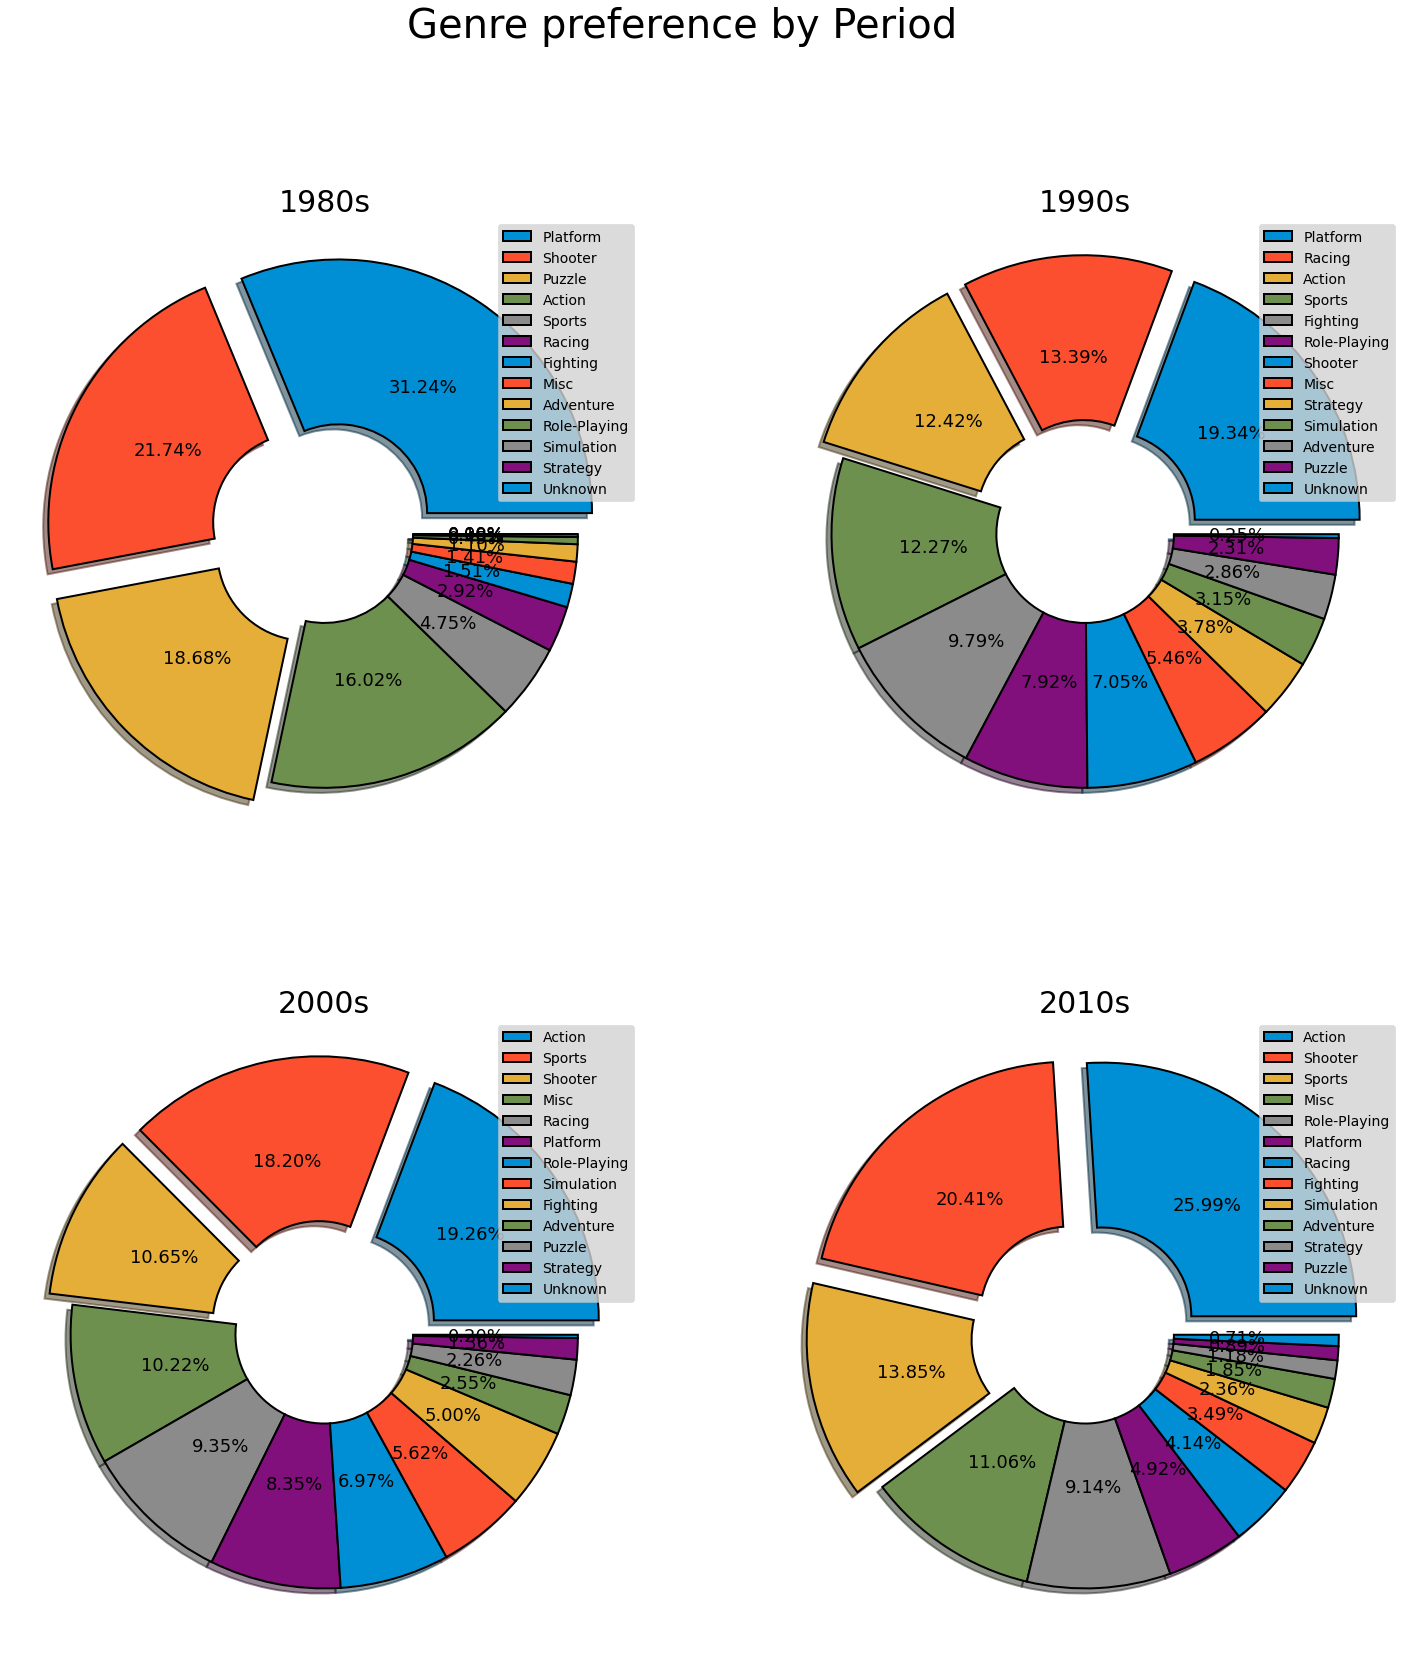

In [51]:
pie_plot(pivot_period)

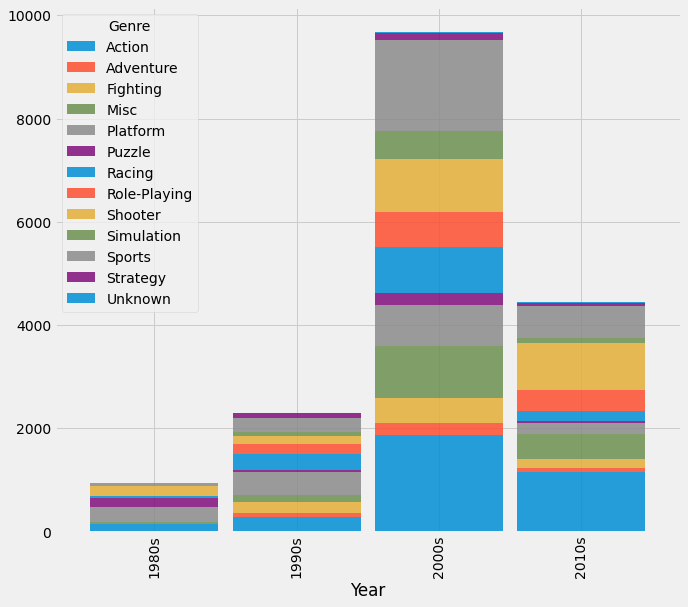

In [52]:
# 바 누적 그래프
plt.style.use('fivethirtyeight')
pivot_period.plot.bar(stacked=True, figsize=(10,9), width=0.9, alpha=0.85)
plt.show();

In [53]:
# # 피벗테이블 만들기
# def pivot_10s(data):
#   df = data.loc[:,['Year','Genre','Total_Sales']]
#   df_pivot = df.pivot_table('Total_Sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)



In [54]:
# # 피벗테이블 만들기
for_pivot = data.loc[:,['Year', 'Genre', 'Total_Sales']]
#for_pivot = for_pivot[for_pivot.Year>1995]
pivot_y_g = for_pivot.pivot_table('Total_Sales', 'Year', 'Genre', aggfunc='sum', fill_value=0)

pivot_y_g.head()

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Unknown
Year,,,,,,,,,,,,,
1980,1.28,0.00,2.88,9.90,0.00,0.00,0.00,0.0,26.24,0.00,1.84,0.0,0.0
1981,53.71,0.00,0.00,0.00,25.88,8.36,1.80,0.0,37.48,1.68,2.96,0.0,0.0
1982,24.28,0.00,0.00,3.24,18.76,37.40,5.88,0.0,14.20,0.00,3.92,0.0,0.0
1983,10.68,1.52,0.00,0.04,11.20,2.88,0.00,0.0,1.80,0.00,2.92,0.0,0.0
1984,3.20,0.00,0.00,0.00,0.00,2.76,9.20,0.0,111.16,0.00,6.80,0.0,0.0


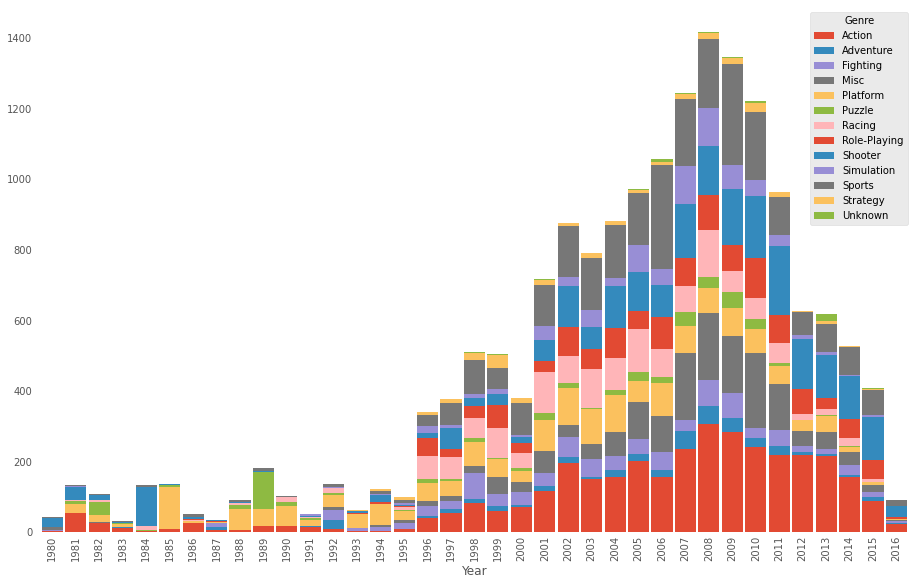

In [55]:
# 바 누적그래프
plt.style.use('ggplot')
pivot_y_g.plot.bar(stacked=True, figsize=(14,9), width=0.9).set_facecolor('white')
plt.show();

###인기가 많은 게임에 대한 분석 및 시각화 프로세스
####플랫폼의 트렌드 확인
 - 10년 단위기간 별 플랫폼의 출고량을 살펴봄
    - 1990년대에서 2000년대로 넘어 오면서 플랫폼의 트렌드가 플랫폼 선택량, 합계출고량에서 모두 두드러지게 변화하는 것을 확인
      따라서 2000년대 이후의 플랫폼 트렌드를 확인해 보았고, **점유율 순위가 오른 X360, PS3플랫폼과, 상위 포지션을 유지 중인 Wii플랫폼에 주목하기로 함**

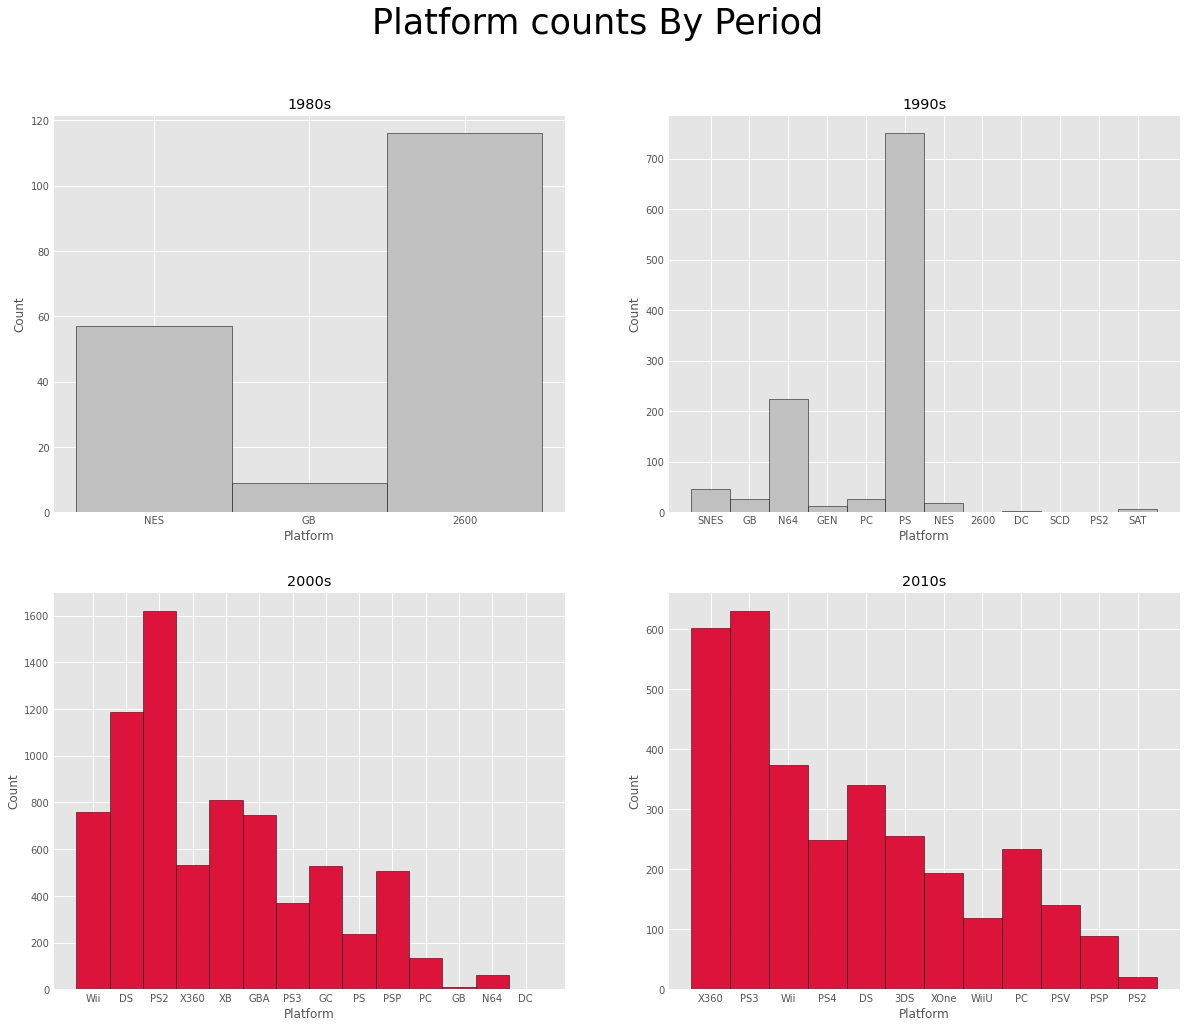

In [56]:
# 게임사들이 그 때에 해당 플랫폼을 많이 선택한 것이지 고객이 많이 이용한 것은 아니기 때문에 총 출고량의 순위를 따라가지 않음
def plat_hist(data):
  i=1
  year_list = list(data.Year.unique())
  color_list = ['silver','silver','crimson','crimson']
  plt.figure(figsize=(18,15)).set_facecolor('white')

  for year in year_list:
    plt.subplot(2,2,i)
    sns.histplot(data=data[data.Year == year].sort_values('Total_Sales',ascending=False).reset_index(),x = 'Platform',\
                 color = color_list[i-1], alpha=1,edgecolor='black') #해당년도의 데이터의 Platform 도수분포표
    plt.title(year)
    i+=1
  plt.suptitle('Platform counts By Period', fontsize=35)
  plt.show();
plat_hist(data_period)

트렌드가 옮겨진 뒤인 2000년대, 2010년대의 데이터만 보자

In [57]:
# 1980년대의 플랫폼 별 출고량 내림차순 정렬
sales_1980 = _1980s.groupby('Platform').sum()["Total_Sales"].sort_values(ascending=False).reset_index()\
.rename(columns={'Total_Sales':'Sales'})
sales_1980.head()

,Platform,Sales
0,NES,451.65
1,2600,321.17
2,GB,162.52


In [58]:
# 1990년대의 플랫폼 별 출고량 내림차순 정렬
sales_1990 = _1990s.groupby('Platform').sum()["Total_Sales"].sort_values(ascending=False).reset_index()\
.rename(columns={'Total_Sales':'Sales'})
sales_1990.head()

,Platform,Sales
0,PS,1069.19
1,N64,463.11
2,GB,252.79
3,SNES,245.16
4,PC,116.53


In [59]:
# 2000년대의 플랫폼 별 출고량 내림차순 정렬
sales_2000 = _2000s.groupby('Platform').sum()["Total_Sales"].sort_values(ascending=False).reset_index()\
.rename(columns={'Total_Sales':'Sales'})
sales_2000.head()

,Platform,Sales
0,PS2,2298.08
1,Wii,1499.03
2,DS,1295.50
3,X360,1054.10
4,XB,735.69


In [60]:
# 2010년대의 플랫폼 별 출고량 내림차순 정렬
sales_2010 = _2010s.groupby('Platform').sum()["Total_Sales"].sort_values(ascending=False).reset_index()\
.rename(columns={'Total_Sales':'Sales'})
sales_2010.head()

,Platform,Sales
0,X360,1334.68
1,PS3,913.74
2,Wii,507.83
3,PS4,384.25
4,XOne,331.02


2000년대 Top5 플랫폼: 
['Wii', 'DS','PS2','X360', 'XB']

2010년대 Top5 플랫폼: 
['X360','PS3','Wii', 'PS4', 'XOne']

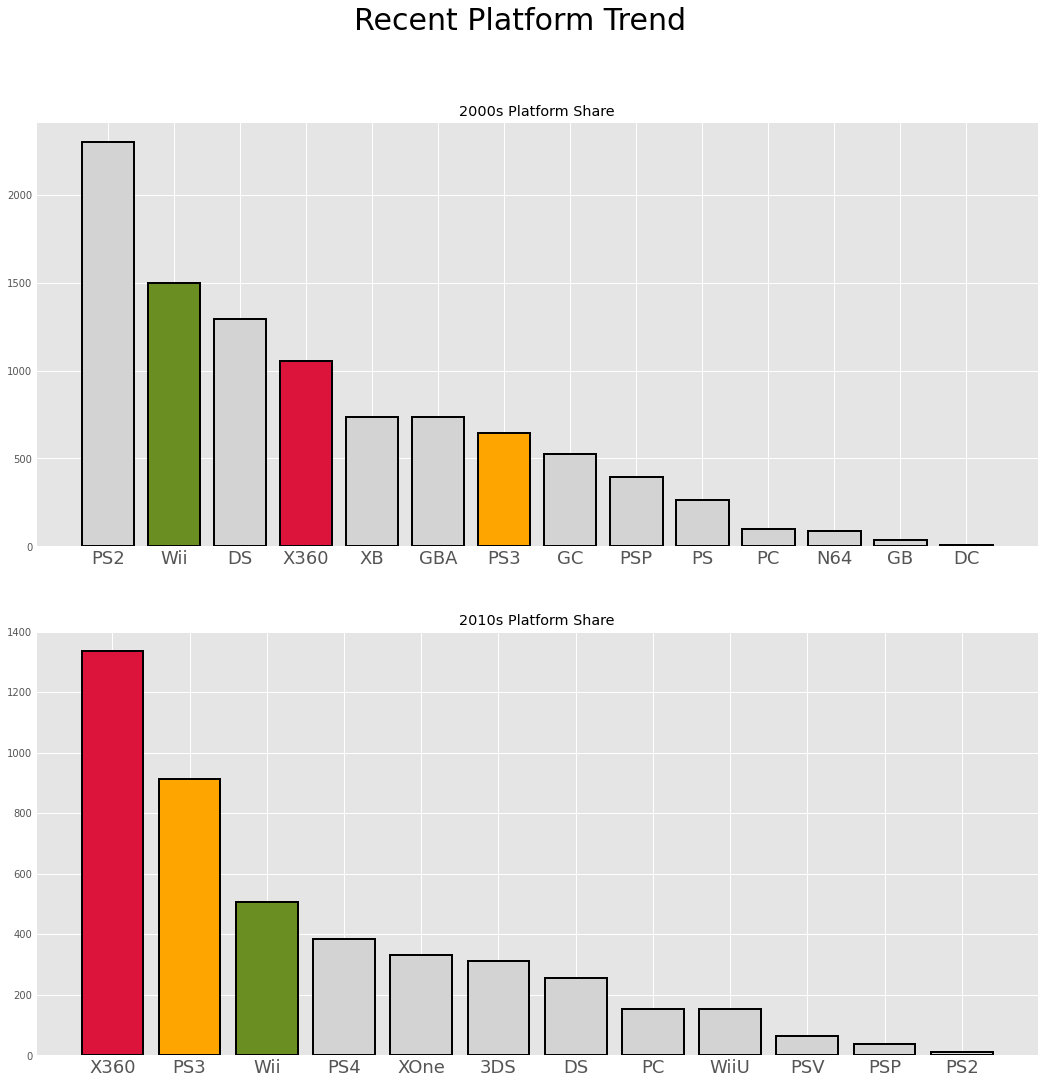

In [61]:
# 기간별 플랫폼 별 출고량 순위 변화 > 트렌드 파악!
plt.figure(figsize=(16,16)).set_facecolor('white')
plt.subplot(2,1,1)
x1 = sales_2000.Platform
y1 = sales_2000.Sales
color = ['lightgrey','olivedrab', 'lightgrey', 'crimson', 'lightgrey', 'lightgrey','orange']
greys1 = ('lightgrey,' * (len(sales_2000) - len(color))).split(',')[:-1]
c1 = color+greys1
plt.bar(x1, y1, color=c1,edgecolor='black', linewidth=2)
plt.xticks(fontsize=18)
plt.title('2000s Platform Share')

plt.subplot(2,1,2)
x2 = sales_2010.Platform
y2 = sales_2010.Sales
greys2 = ('lightgrey,' * (len(sales_2010) - 4)).split(',')[:-1]
c2 = ['crimson','orange','olivedrab', 'lightgrey'] + greys2
plt.bar(x2, y2, color=c2,edgecolor='black', linewidth=2)
plt.xticks(fontsize=18)
plt.title('2010s Platform Share')

plt.suptitle("Recent Platform Trend", fontsize=30)
plt.show();

- 인기장르: Action, Shooter, Sports
  
  인기플랫폼: PS3, X360, Wii
    - 장르별로 3가지 플랫폼중 1순위를 찾아

    (Action, 플랫폼1): **(Action, X360)**
    
    (Shooter, 플랫폼2): **(Shooter, X360)**

    (Sports, 플랫폼3): **(Sports, Wii)**

    이렇게 3가지의 게임 출시


####인기 장르별 인기 플랫폼 3가지의 출고량 순위 시각화
- 각 장르의 1위 플랫폼을 파악하여 다음 분기에 출시할 게임의 장르, 사용할 플랫폼을 정해보려고 한다.

In [62]:
# 2000년대 이후 데이터
data_21c = data.loc[data.Year>1999]

# Action 인기플랫폼 순위
action = data_21c.query("Genre == 'Action' and Platform in ['PS3', 'X360', 'Wii']")
action_plf = action.groupby('Platform').sum().reset_index()[['Platform', 'Total_Sales']]
action_plf.sort_values('Total_Sales', ascending=False, inplace=True)
# Shooter 인기플랫폼 순위
shooter = data_21c.query("Genre == 'Shooter' and Platform in ['PS3', 'X360', 'Wii']")
shooter_plf = shooter.groupby('Platform').sum().reset_index()[['Platform', 'Total_Sales']]
shooter_plf.sort_values('Total_Sales', ascending=False, inplace=True)
# Sports 인기플랫폼 순위
sports = data_21c.query("Genre == 'Sports' and Platform in ['PS3', 'X360', 'Wii']")
sports_plf = sports.groupby('Platform').sum().reset_index()[['Platform', 'Total_Sales']]
sports_plf.sort_values('Total_Sales', ascending=False, inplace=True)

In [63]:
pie_list = [action_plf, shooter_plf, sports_plf]

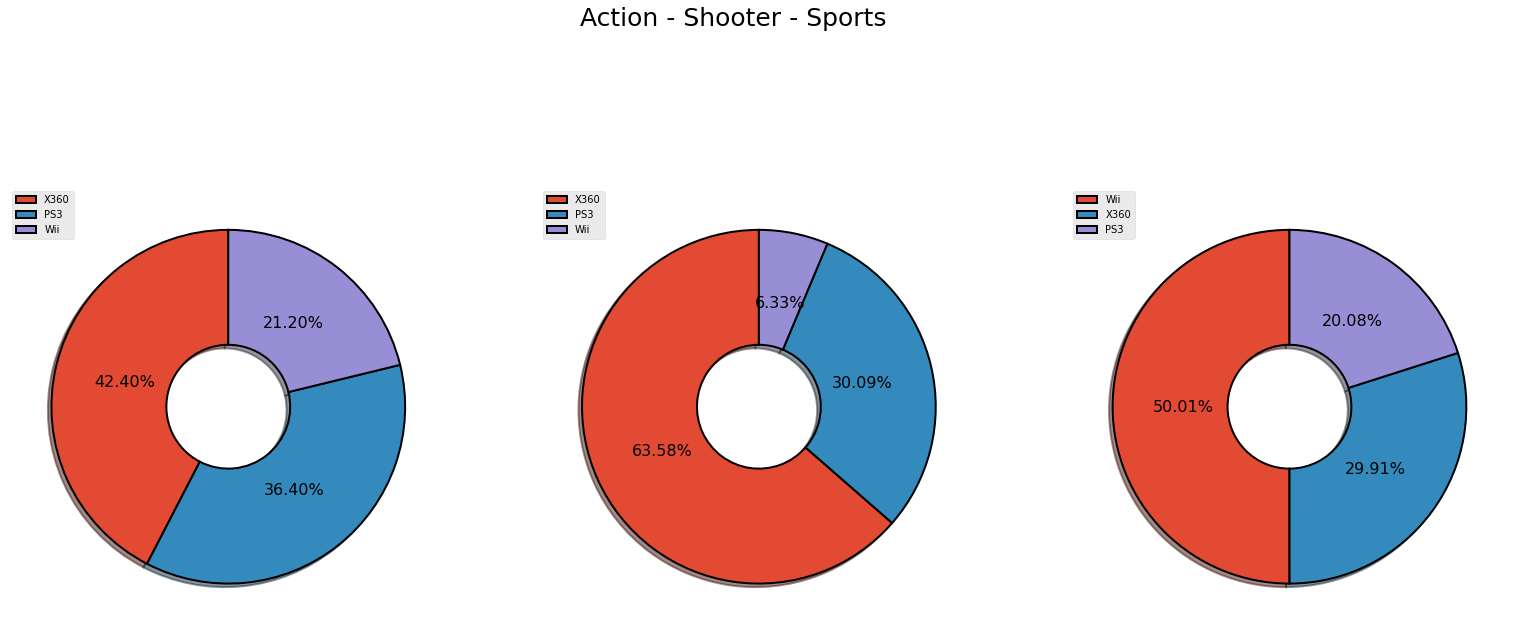

In [64]:
# 장르별 플랫폼 순위 pie plot.
def plf_share_pie(df):
  plt.subplot(1,3,i+1)
  plt.pie(df.Total_Sales, startangle=90, autopct="%.2f%%", shadow=True, pctdistance=0.6,\
            wedgeprops=edge,textprops={'fontsize': 16})
  plt.legend(df.Platform,loc='upper left')
#exp=[0.05,0,0]
edge = {'edgecolor': 'black','linewidth':2, 'width':0.65}
plt.figure(figsize=(24,11)).set_facecolor('white')
plt.style.use('ggplot')
for i in range(len(pie_list)):
  plf_share_pie(pie_list[i])

plt.suptitle('Action - Shooter - Sports', fontsize = 25)
plt.show();

In [65]:
# # 트렌드가 옮겨진 뒤인 2000년대, 2010년대의 데이터만 보자
# # 게임별 총 출고량 순으로 정렬
# rank_2000 = data.iloc[_2000s.index].groupby("Name").max()['Total_Sales'].reset_index()
# rank_2010 = data.iloc[_2010s.index].groupby("Name").max()['Total_Sales'].reset_index()
# len(rank_2010)

In [66]:
# # 2000년대의 인기장르 인기플랫폼에 해당하는 게임들
# g = _2000s.query('Genre == "Action" | Genre == "Shooter" | Genre == "Sports"')
# p = _2000s.query('Platform == "PS3" | Platform =="X360" | Platform =="Wii"')
# p_g_2000 = g.merge(p, how='inner')
# print('2000년대의 인기장르, 인기플랫폼에 해당하는 게임 수: ', len(p_g_2000))

# # 2010년대의 인기장르 인기플랫폼에 해당하는 게임들
# g2 = _2010s.query('Genre == "Action" | Genre == "Shooter" | Genre == "Sports"')
# p2 = _2010s.query('Platform == "PS3" | Platform =="X360" | Platform =="PS4" | Platform =="Wii"')
# p_g_2010 = g2.merge(p2, how='inner')
# print('2010년대의 인기장르, 인기플랫폼에 해당하는 게임 수: ', len(p_g_2010))

In [67]:
# # 추려낸 데이터 합치기
# selected_games = pd.concat([p_g_2000,p_g_2010]).sort_values('Total_Sales', ascending=False).reset_index().iloc[:,1:]
# selected_games.head()

In [68]:
# sales_cutline = round(selected_games.Total_Sales.sum()/2,2)
# # 게임별 출고량이 많은 순으로 누적 출고량이 상위 50%가 되는 데이터까지만 살펴보자
# sales_cutline

In [69]:
# #누적출고량 컬럼 추가
# selected_games['Accumulated_Sales'] = selected_games.Total_Sales.cumsum()
# selected_games.rename(columns = {'Accumulated_Sales':'Cum_Sales'}, inplace=True)

In [70]:
# final_df = selected_games.loc[selected_games.Cum_Sales < sales_cutline]
# final_df.groupby('Publisher').sum()['Total_Sales'].sort_values(ascending=False)

In [71]:
# # 게임별 총 출고량
# platform_ranks = data.groupby(['Name'])['Total_Sales'].sum().reset_index().sort_values('Total_Sales', ascending=False)
# platform_ranks.reset_index(inplace=True)
# platform_ranks.drop(columns='index', inplace=True)
# platform_ranks.head()

In [73]:
# styles = ['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 
#  'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 
#  'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 
#  'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 
#  'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 
#  'tableau-colorblind10']
# def plot_colors(style):
#     plt.figure(figsize=(10,2))
#     plt.style.use(style)
#     for i in range(10):
#         plt.plot([0,1],[i,i])
#     plt.title(style)
#     plt.show()
# for style in styles:
#     plot_colors(style)